<a href="https://colab.research.google.com/github/Juhi-Purswani/Offline_Signature_Verification/blob/master/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
 !ls

drive  sample_data


In [0]:
import os
os.chdir('./drive/My Drive/SignForge')

In [4]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 
import numpy as np
from keras.utils import to_categorical

from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

import matplotlib.pyplot as plt

TRAIN_DIR = 'data/train_set'
TEST_DIR = 'data/test_set'
IMG_SIZE = 224
img_rows, img_cols, img_channel = 224, 224, 3


Using TensorFlow backend.


In [0]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      

TRAIN_DIR = 'data/train_set'
TEST_DIR = 'data/test_set'
IMG_SIZE = 224


In [0]:
def person_img(img):
    label = img.split('.')
    k = label[0]
    return [k[-3:]]
def create_features(DIR):
    features = []
    labels = []
    for img in tqdm(os.listdir(DIR)):
        label = label_img(img)
        person = person_img(img)
       
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        features.append([img])
        labels.append(np.array(label))
    return features
def label_img(img):
    image_label = img.split('.')
    name = image_label[0]
    # checking if the signature is forged or genuine
    #                            
    
    if name[4:7] == name[-3:]:
        return 1
  
    elif name[4:7] != name[-3:]:
        return 0

In [7]:
train_features  = np.array(create_features(TRAIN_DIR))
test_features  = np.array(create_features(TEST_DIR))
print (test_features.shape)
train_features_reshaped = train_features.reshape(-1,224,224,3)
test_features_reshaped = test_features.reshape(-1,224,224,3)
print (test_features_reshaped.shape)
print (train_features_reshaped.shape)

train_features_reshaped = train_features_reshaped.astype('float32')
test_features_reshaped = test_features_reshaped.astype('float32')
train_features_reshaped = train_features_reshaped / 255.
test_features_reshaped = test_features_reshaped / 255.
#print (train_features_reshaped)

100%|██████████| 121/121 [00:39<00:00,  3.49it/s]


(121, 1, 224, 224, 3)
(121, 224, 224, 3)
(179, 224, 224, 3)


In [8]:
train_features_reshaped.shape

(179, 224, 224, 3)

In [9]:
def create_labels(DIR):
    labels = []
    for img in tqdm(os.listdir(DIR)):
        label = label_img(img)
        labels.append(np.array(label))
    return labels
train_labels = np.array(create_labels(TRAIN_DIR))
test_labels = np.array(create_labels(TEST_DIR))
print (test_labels.shape)
train_labels_one_hot = to_categorical(train_labels)
#print (train_labels_one_hot)
test_labels_one_hot = to_categorical(test_labels)
print (test_labels_one_hot.shape)

100%|██████████| 121/121 [00:00<00:00, 223081.66it/s]

(121,)
(121, 2)


In [13]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))
base_model.summary()

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(2, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

W0713 14:59:58.362632 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 14:59:58.431775 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 14:59:58.446002 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 14:59:58.510613 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 1s 0us/step


W0713 15:00:00.073915 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 15:00:00.075343 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0713 15:00:00.686165 140133506992000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 15:00:00.697702 140133506992000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [14]:
batch_size = 32
epochs = 50

history = model.fit(train_features_reshaped, train_labels_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_features_reshaped, test_labels_one_hot))


Train on 179 samples, validate on 121 samples
Epoch 1/50
179/179 [==============================] - 415s 2s/step - loss: 0.7668 - acc: 0.4860 - val_loss: 0.6976 - val_acc: 0.4917
Epoch 2/50
179/179 [==============================] - 410s 2s/step - loss: 0.7320 - acc: 0.4972 - val_loss: 0.7441 - val_acc: 0.4959
Epoch 3/50
179/179 [==============================] - 414s 2s/step - loss: 0.7009 - acc: 0.5503 - val_loss: 0.6880 - val_acc: 0.5579
Epoch 4/50
179/179 [==============================] - 413s 2s/step - loss: 0.6817 - acc: 0.5279 - val_loss: 0.6804 - val_acc: 0.5785
Epoch 5/50
179/179 [==============================] - 413s 2s/step - loss: 0.6621 - acc: 0.6117 - val_loss: 0.6707 - val_acc: 0.5620
Epoch 6/50
179/179 [==============================] - 413s 2s/step - loss: 0.6451 - acc: 0.6620 - val_loss: 0.6584 - val_acc: 0.6364
Epoch 7/50
179/179 [==============================] - 415s 2s/step - loss: 0.6293 - acc: 0.7067 - val_loss: 0.6498 - val_acc: 0.6488
Epoch 8/50
179/179 [===

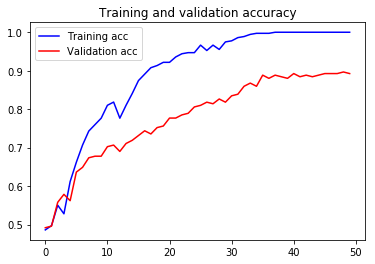

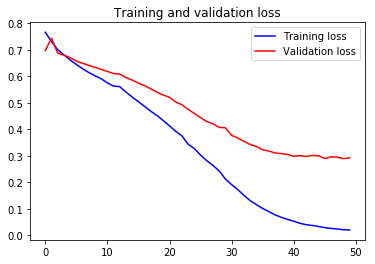

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [15]:
base_model1 = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))
for layer in base_model1.layers[:-12]:
    layer.trainable = False
    
for layer in base_model1.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f154c171d68> False
<keras.layers.convolutional.Conv2D object at 0x7f154c171a58> False
<keras.layers.convolutional.Conv2D object at 0x7f154c1df550> False
<keras.layers.pooling.MaxPooling2D object at 0x7f154c178518> False
<keras.layers.convolutional.Conv2D object at 0x7f154c178588> False
<keras.layers.convolutional.Conv2D object at 0x7f154c1a1da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f154c135710> False
<keras.layers.convolutional.Conv2D object at 0x7f154c135860> True
<keras.layers.convolutional.Conv2D object at 0x7f154c165cf8> True
<keras.layers.convolutional.Conv2D object at 0x7f154c0fcf28> True
<keras.layers.pooling.MaxPooling2D object at 0x7f154c110a90> True
<keras.layers.convolutional.Conv2D object at 0x7f154c1290f0> True
<keras.layers.convolutional.Conv2D object at 0x7f154c0c3ac8> True
<keras.layers.convolutional.Conv2D object at 0x7f154c0d4ac8> True
<keras.layers.pooling.MaxPooling2D object at 0x7f154c0ecf60> True
<

In [16]:
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model1.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(2, activation='sigmoid'))

model2 = Model(inputs=base_model1.input, outputs=add_model(base_model1.output))
model2.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
batch_size = 32
epochs = 50

history = model2.fit(train_features_reshaped, train_labels_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_features_reshaped, test_labels_one_hot))


Train on 179 samples, validate on 121 samples
Epoch 1/50
179/179 [==============================] - 304s 2s/step - loss: 0.7103 - acc: 0.4860 - val_loss: 0.7008 - val_acc: 0.5000
Epoch 2/50
179/179 [==============================] - 300s 2s/step - loss: 0.6996 - acc: 0.4832 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 3/50
179/179 [==============================] - 302s 2s/step - loss: 0.6778 - acc: 0.5447 - val_loss: 0.6868 - val_acc: 0.5083
Epoch 4/50
179/179 [==============================] - 302s 2s/step - loss: 0.6683 - acc: 0.5950 - val_loss: 0.6771 - val_acc: 0.5207
Epoch 5/50
179/179 [==============================] - 301s 2s/step - loss: 0.6495 - acc: 0.6201 - val_loss: 0.6651 - val_acc: 0.6033
Epoch 6/50
179/179 [==============================] - 301s 2s/step - loss: 0.6370 - acc: 0.6620 - val_loss: 0.6558 - val_acc: 0.5785
Epoch 7/50
179/179 [==============================] - 302s 2s/step - loss: 0.6215 - acc: 0.6983 - val_loss: 0.6480 - val_acc: 0.6364
Epoch 8/50
179/179 [===

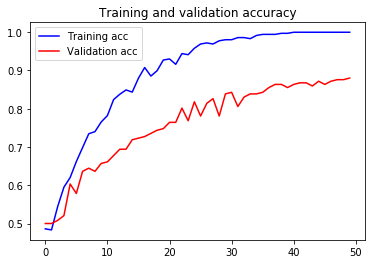

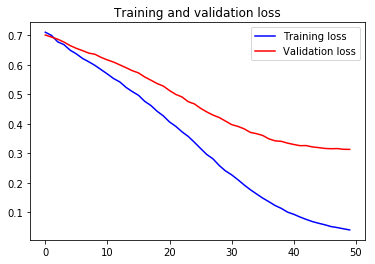

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()